In [1]:
from __future__ import annotations
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
data_dir = os.path.join(os.path.dirname('file'))
data_dir = os.path.join("data")
data_dir = os.path.abspath(data_dir)

hydro_dir = os.path.join(data_dir,'hydro')
climate_dir = os.path.join(data_dir,'climate')

In [3]:
def csv_dir_to_df(dir,prefix,cols):
    result = {}

    for file in os.listdir(dir):
        if file.startswith(prefix) and file.endswith(".csv"):
            file_path = os.path.abspath(os.path.join(dir, file))
            
            result[file] = pd.read_csv(file_path,header = None,names = cols,encoding="ANSI")
            
    return result

In [6]:
hydro_data: pd.DataFrame
climate_data: pd.DataFrame

hydro_data = csv_dir_to_df(hydro_dir,"mies",["Code","Name","River","Water_year","Water_month","Extrema","Height","Q","Water_temp","Month"])
climate_data = csv_dir_to_df(climate_dir,"k_m_d_",
["Code","Name","Year","Month","Abs_max_temp","State_tmax","Mean_max_temp","State_tmeanmax","Abs_min_temp","State_tmin","Mean_min_temp",
"State_tmeanmin","Mean_temp","State_mean_temp","Min_ground_temp","State_min_tground","Rain_sum","State_rain_sum","Max_daily_rain","Status_max_dayrain",
"First_day_max_rain","Last_day_max_rain","Max_snow","Status_max_snow","Days_w_snow_on_gnd","Days_w_rain","Days_w_snow"])

for hdata in hydro_data:
    df = hydro_data[hdata]
    df.drop(columns=["Code"], inplace=True)
    df.drop(columns=["Q"], inplace=True)
    df.drop(columns=["River"], inplace=True)

    df.drop(df[df["Name"] != "KRAKÓW-BIELANY"].index, inplace=True)
    df.drop(df[df["Extrema"] != 2].index, inplace=True)

for cdata in climate_data:
    df = climate_data[cdata]
    df.drop(columns=["Abs_max_temp"],inplace=True)
    df.drop(columns=["State_tmax"],inplace=True)
    df.drop(columns=["Mean_max_temp"],inplace=True)
    df.drop(columns=["State_tmeanmax"],inplace=True)
    df.drop(columns=["Abs_min_temp"],inplace=True)
    df.drop(columns=["State_tmin"],inplace=True)
    df.drop(columns=["Mean_min_temp"],inplace=True)
    df.drop(columns=["State_tmeanmin"],inplace=True)
    df.drop(columns=["Min_ground_temp"],inplace=True)
    df.drop(columns=["State_min_tground"],inplace=True)
    df.drop(columns=["Max_daily_rain"],inplace=True)
    df.drop(columns=["Status_max_dayrain"],inplace=True)
    df.drop(columns=["First_day_max_rain"],inplace=True)
    df.drop(columns=["Last_day_max_rain"],inplace=True)
    df.drop(columns=["Max_snow"],inplace=True)
    df.drop(columns=["Status_max_snow"],inplace=True)
    df.drop(columns=["Days_w_snow_on_gnd"],inplace=True)
    df.drop(columns=["Days_w_rain"],inplace=True)
    df.drop(columns=["Days_w_snow"],inplace=True)

    df.drop(df[df["Name"] != "KRAKÓW-OBSERWATORIUM"].index, inplace=True)


                 Name  Water_year  Water_month  Extrema  Height  Water_temp  \
12562  KRAKÓW-BIELANY        2009            1        2     148         9.0   
12565  KRAKÓW-BIELANY        2009            2        2     166         4.9   
12568  KRAKÓW-BIELANY        2009            3        2     161         1.7   
12571  KRAKÓW-BIELANY        2009            4        2     170         2.8   
12574  KRAKÓW-BIELANY        2009            5        2     241         4.2   

       Month  
12562     11  
12565     12  
12568      1  
12571      2  
12574      3  


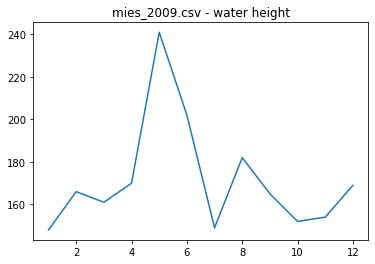

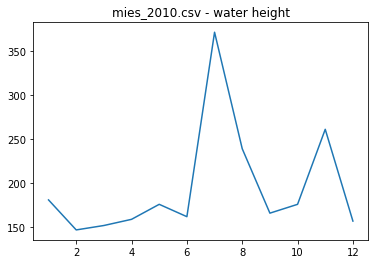

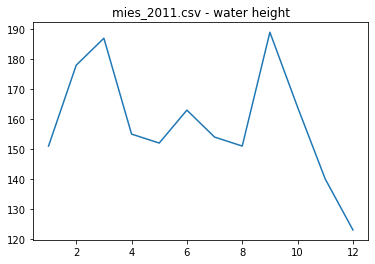

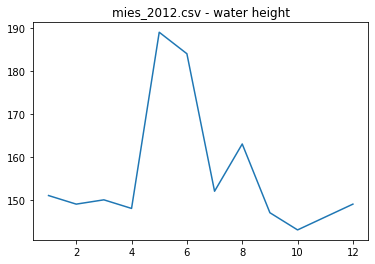

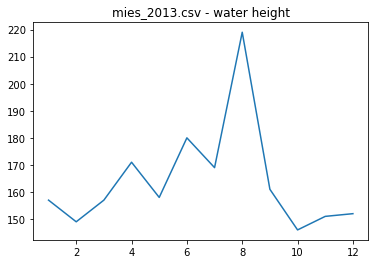

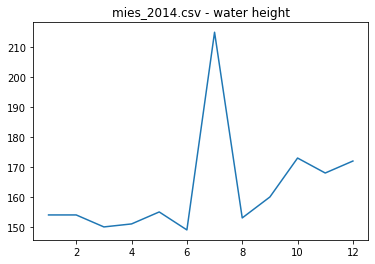

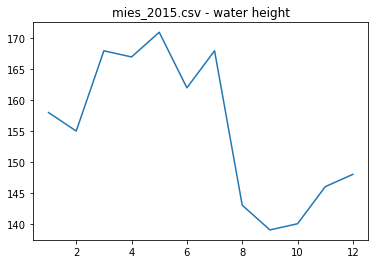

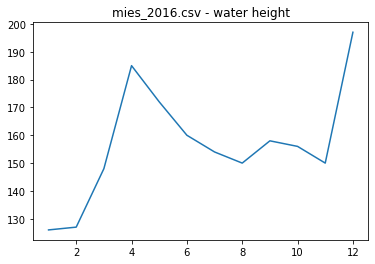

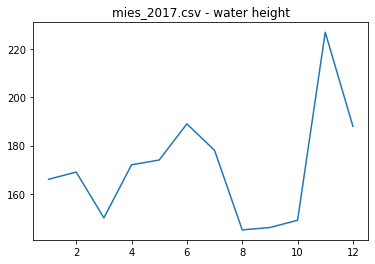

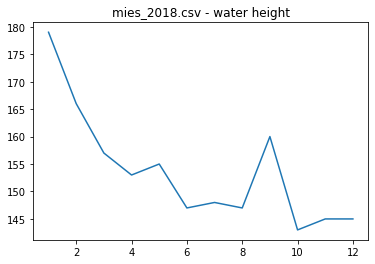

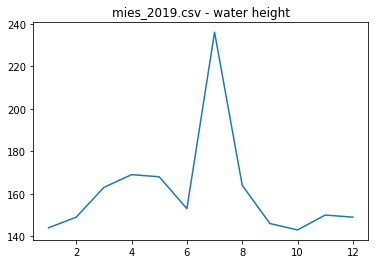

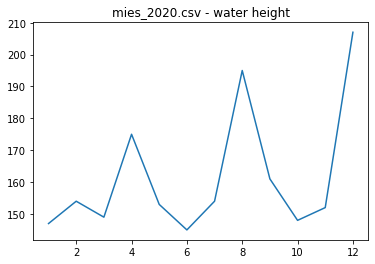

In [7]:
hydro_keys = list(hydro_data.keys())
print(hydro_data[hydro_keys[0]].head())

for key in hydro_keys:
    df: pd.DataFrame
    df = df = hydro_data[key]
    plt.plot(df["Water_month"],df["Height"])
    #print(df["Water_year"])
    plt.title(f"{key} - water height")
    plt.show()




          Code                  Name  Year  Month  Mean_temp  State_mean_temp  \
850  250190390  KRAKÓW-OBSERWATORIUM  2009      1       -2.4              NaN   
851  250190390  KRAKÓW-OBSERWATORIUM  2009      2       -0.3              NaN   
852  250190390  KRAKÓW-OBSERWATORIUM  2009      3        3.4              NaN   
853  250190390  KRAKÓW-OBSERWATORIUM  2009      4       12.1              NaN   
854  250190390  KRAKÓW-OBSERWATORIUM  2009      5       14.6              NaN   

     Rain_sum  State_rain_sum  
850      35.2             NaN  
851      41.1             NaN  
852      64.9             NaN  
853       0.5             NaN  
854      91.0             NaN  


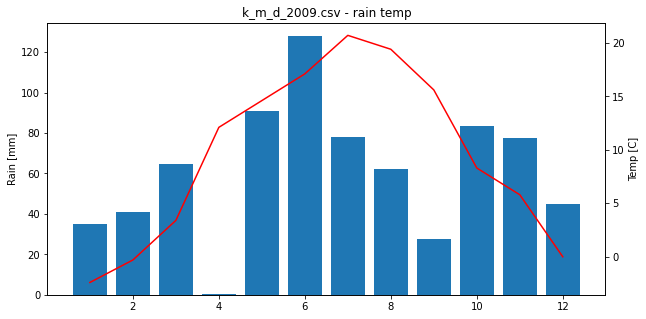

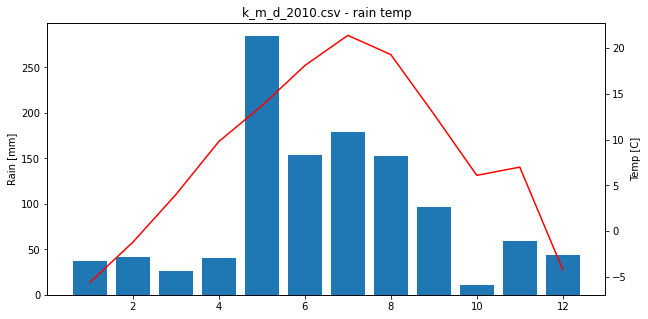

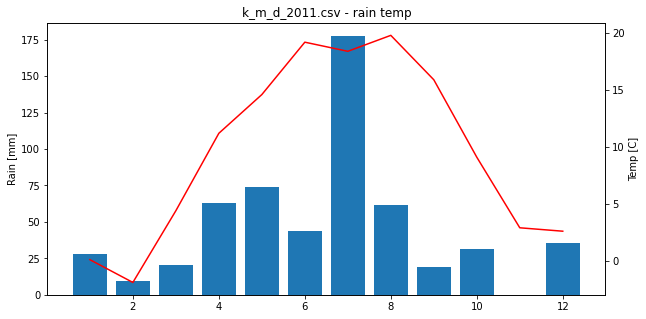

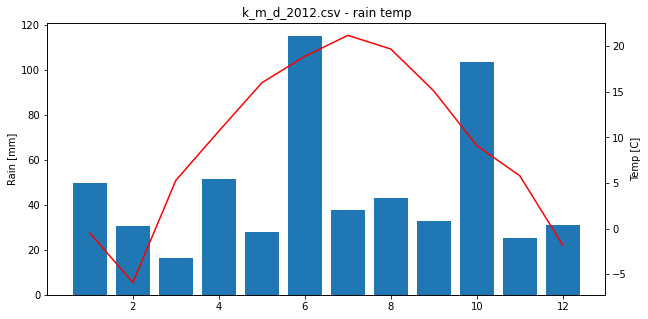

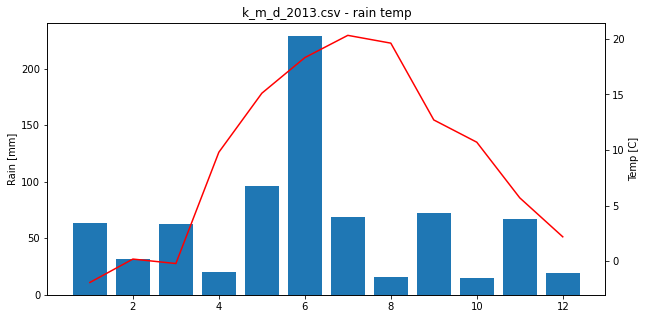

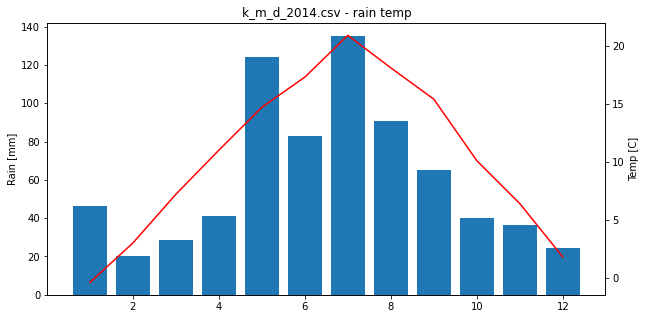

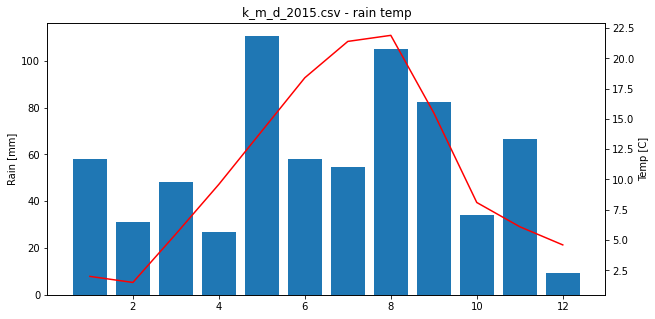

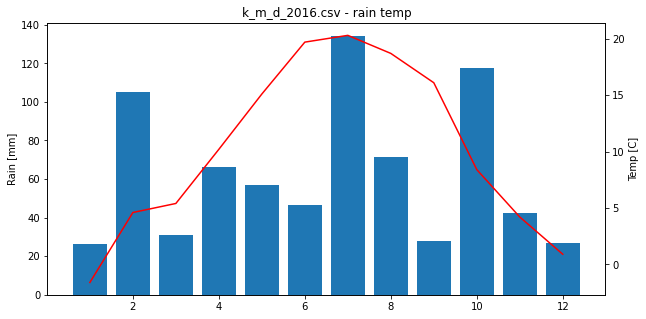

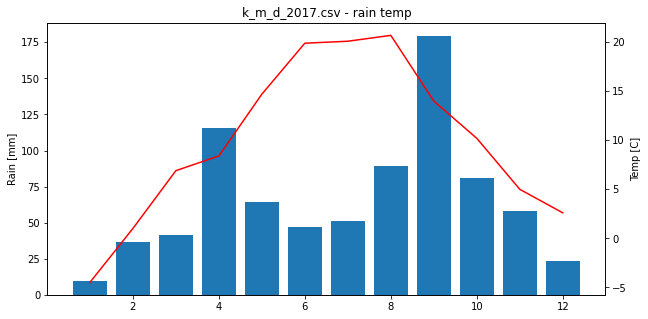

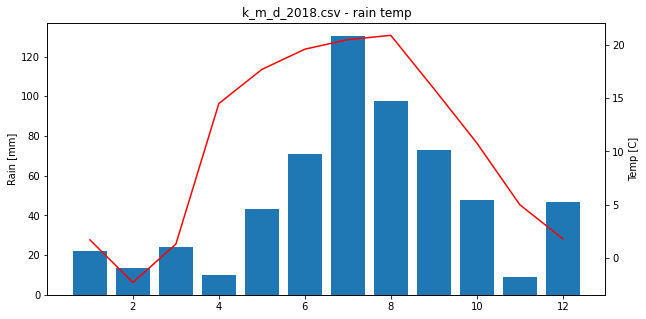

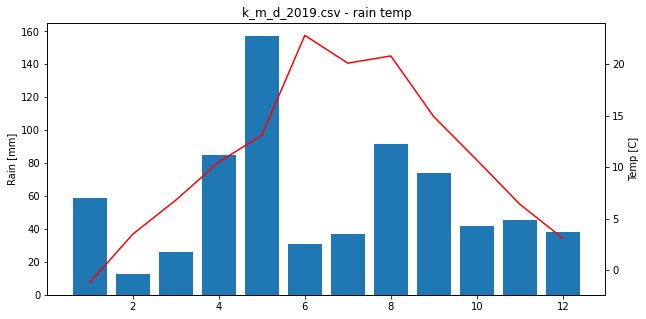

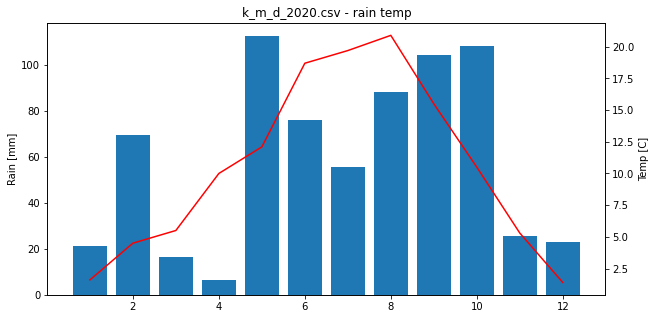

In [8]:
climate_keys = list(climate_data.keys())
print(climate_data[climate_keys[0]].head())

for key in climate_keys:
    df: pd.DataFrame
    df = df = climate_data[key]

    fig, ax1 = plt.subplots(figsize = (10, 5))
    ax2 = ax1.twinx()

    
    ax1.bar(df["Month"],df["Rain_sum"],)
    ax1.set_ylabel("Rain [mm]")
    ax2.plot(df["Month"],df["Mean_temp"],'r')
    ax2.set_ylabel("Temp [C]")
    #print(df["Water_year"])
    plt.title(f"{key} - rain temp")
    plt.show()